<a href="https://colab.research.google.com/github/KhaiNghiTranNguyen/AI-YOLO-CNN/blob/main/Ph%C3%A2n_lo%E1%BA%A1i_c%C3%A1c_chai_n%C6%B0%E1%BB%9Bc_ng%E1%BB%8Dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!unzip -q /content/sample_data/Bottle.zip -d /content/sample_data/Bottle
data = '/content/sample_data/Bottle'

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 


0: 640x640 1 bottle, 544.7ms
Speed: 32.0ms preprocess, 544.7ms inference, 11.1ms postprocess per image at shape (1, 3, 640, 640)
Kết quả phát hiện:
Đối tượng: bottle
 - Xác suất: 0.87
 - Toạ độ: (175, 14), (312, 476)


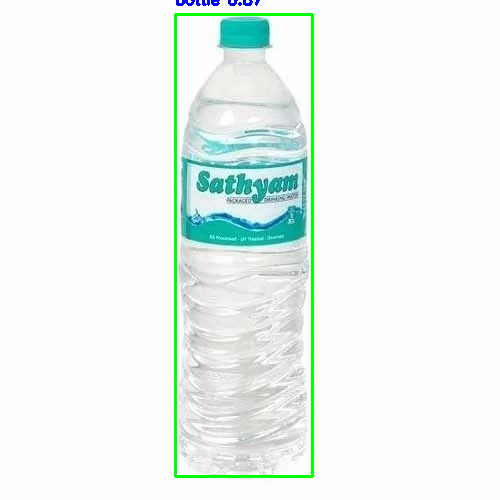

In [14]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2_imshow is already imported

# Tải mô hình YOLO
model = YOLO("yolov8n.pt")  # Thay bằng đường dẫn đến mô hình YOLO của bạn
image_path = "/content/sample_data/filled-mineral-water-bottle-500x500_102_11zon_3_11zon.jpeg"  # Thay bằng đường dẫn ảnh của bạn

def detect_objects(image_path):
    # Đọc hình ảnh
    image = cv2.imread(image_path)
    if image is None:
        print("Không thể đọc ảnh.")
        return

    # Thực hiện phát hiện
    results = model(image)

    # Vẽ bounding box và thông tin lên hình ảnh
    print("Kết quả phát hiện:")
    for result in results:
        boxes = result.boxes
        for box in boxes:
            # Lấy thông tin bounding box và nhãn
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Toạ độ (x1, y1, x2, y2)
            confidence = float(box.conf)  # Chuyển đổi xác suất từ Tensor sang float
            label = model.names[int(box.cls)]  # Nhãn đối tượng

            # In thông tin ra console
            print(f"Đối tượng: {label}")
            print(f" - Xác suất: {confidence:.2f}")
            print(f" - Toạ độ: ({x1}, {y1}), ({x2}, {y2})")

            # Hiển thị bounding box và nhãn trên hình ảnh
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{label} {confidence:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Hiển thị ảnh kết quả
    cv2_imshow(image) # Changed cv2.imshow to cv2_imshow
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Thực hiện phát hiện
detect_objects(image_path)

In [21]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split # Import train_test_split

data = '/content/sample_data/Bottle/Chai nước'

IMG_SIZE = 128
images, labels, label_map = [], [], {}
# Create a set to store unique labels
unique_labels = set()

# Lặp qua các thư mục con (mỗi thư mục = 1 lớp)
for idx, cls in enumerate(sorted(os.listdir(data))):
    cls_path = os.path.join(data, cls)
    if not os.path.isdir(cls_path):
        continue

    label_map[idx] = cls
    for f in os.listdir(cls_path):
        try:
            img = Image.open(os.path.join(cls_path, f)).convert('RGB')
            img = img.resize((IMG_SIZE, IMG_SIZE))
            images.append(np.asarray(img))
            # Subtract 1 from the label to make it 0-based
            labels.append(idx)
            unique_labels.add(idx) # Add the label to the set
        except Exception as e:
            print('Lỗi khi đọc', f, ':', e)

# Chuyển sang numpy & chuẩn hoá
X = np.array(images, dtype='float32') / 255.0

# Ensure num_classes covers all unique labels
num_classes = len(unique_labels) # or max(labels) + 1

# Adjust labels to be 0-based
labels = [label -1 for label in labels]

y = to_categorical(np.array(labels), num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print('Tổng ảnh:', X.shape[0])

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Tổng ảnh: 447


In [22]:
from PIL import Image
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
model = Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    MaxPooling2D(2,2),

    Flatten(),                       # 16×16×128 = 32 768 units
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_map), activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,709,026 (33.22 MB)

 Trainable params: 8,709,026 (33.22 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

print('Accuracy:', model.evaluate(X_test, y_test, verbose=0))
model.save('/content/my_model.h5')

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.5729 - loss: 0.7293 - val_accuracy: 0.6889 - val_loss: 0.5832
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.6684 - loss: 0.6095 - val_accuracy: 0.6889 - val_loss: 0.5736
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.6769 - loss: 0.5756 - val_accuracy: 0.6889 - val_loss: 0.5789
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.6864 - loss: 0.5723 - val_accuracy: 0.6889 - val_loss: 0.6913
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.7061 - loss: 0.6136 - val_accuracy: 0.6889 - val_loss: 0.5707
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.7203 - loss: 0.5433 - val_accuracy: 0.6889 - val_loss: 0.5601
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.6924 - loss: 0.5175 - val_accuracy: 0.6889 - val_loss: 0.5670
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.7157 - loss: 0.4743 - val_accuracy: 0.7556 - val_loss:

Accuracy: [0.48430562019348145, 0.800000011920929]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


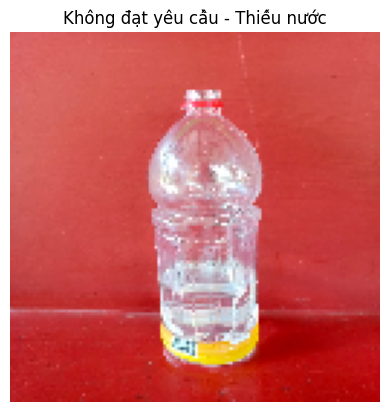

Tình trạng: Không đạt yêu cầu - Thiếu nước


In [28]:
import matplotlib.pyplot as plt
def predict_image(path):
    img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
    arr = img_to_array(img)/255.0
    pred = model.predict(arr.reshape(1,IMG_SIZE,IMG_SIZE,3))
    cls = np.argmax(pred)
    # Add 1 to cls to align with label_map keys
    plt.imshow(img); plt.axis('off'); plt.title(label_map[cls + 1]); plt.show()
    print('Tình trạng:', label_map[cls + 1])

predict_image('/content/sample_data/IMG_20221226_131312_11_11zon.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


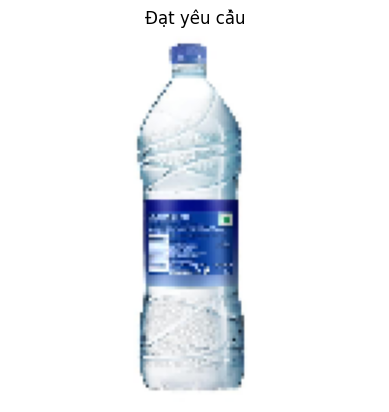

Tình trạng: Đạt yêu cầu


In [29]:
import matplotlib.pyplot as plt
def predict_image(path):
    img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
    arr = img_to_array(img)/255.0
    pred = model.predict(arr.reshape(1,IMG_SIZE,IMG_SIZE,3))
    cls = np.argmax(pred)
    # Add 1 to cls to align with label_map keys
    plt.imshow(img); plt.axis('off'); plt.title(label_map[cls + 1]); plt.show()
    print('Tình trạng:', label_map[cls + 1])

predict_image('/content/sample_data/242060-2_1-aquafina-packaged-drinking-water_44_11zon.jpeg')